In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
labels_dir = '/cnl/abcd/data/labels/' 
os.chdir(labels_dir)
labels=pd.read_csv('baseline_depr.csv',header=None, index_col=0)


'NDARINV08FUB58A'

In [4]:
import glob

os.chdir("/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/baseline_depr/")
# os.chdir('/nadata/cnl/abcd/data/imaging/fmri/nback/interim/segmented/baseline/')
files = glob.glob("**/filt_fMRI_segmented**.csv", recursive=True)

In [64]:
control=[]
depressed=[]
for f in files:
    if labels.values[np.where(labels.index.values==f.split('/')[0].split('-')[-1])]==0:
        ts = np.loadtxt(f, delimiter=",", dtype=float)
        control.append(np.mean(ts[1:], axis=0))
    elif labels.values[np.where(labels.index.values==f.split('/')[0].split('-')[-1])]==1:
        ts = np.loadtxt(f, delimiter=",", dtype=float)
        depressed.append(np.mean(ts[1:], axis=0))
        

/tmp/ipykernel_829305/2121915564.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if labels.values[np.where(labels.index.values==f.split('/')[0].split('-')[-1])]==0:
/tmp/ipykernel_829305/2121915564.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif labels.values[np.where(labels.index.values==f.split('/')[0].split('-')[-1])]==1:


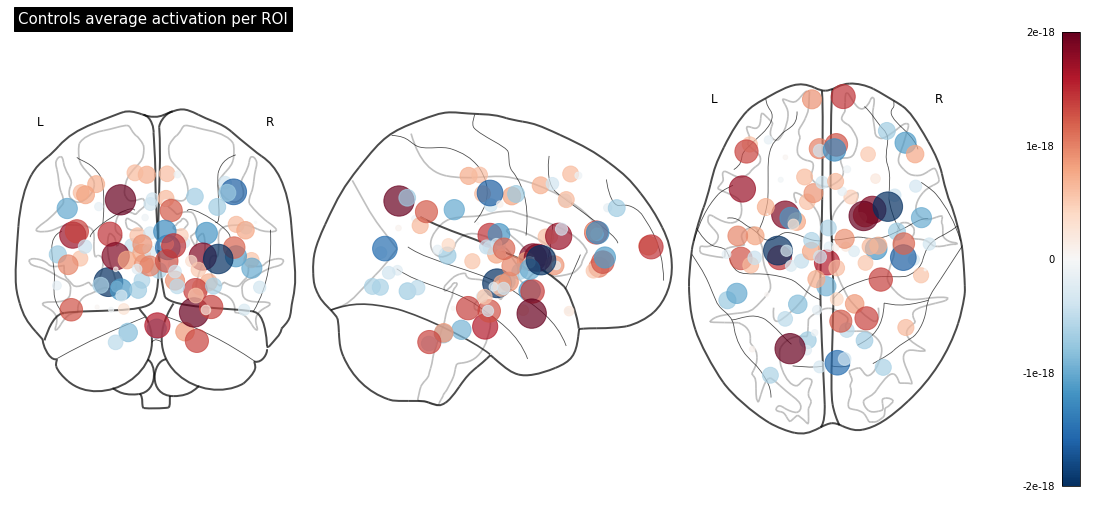

In [83]:
from nilearn import plotting
import numpy as np
import seaborn as sns



positions = pd.read_csv(
                "/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/baseline/downloads/sub-NDARINV04GAB2AA/ROIs_centroid_coordinates.csv"
            )
coord_list = np.asarray(positions[["x", "y", "z"]])

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,7))
plotting.plot_markers(
    np.mean(control,axis=0),
    coord_list,
    node_cmap="RdBu_r",
    figure=fig,
    node_vmin=-2e-18,
    node_vmax=2e-18,
    node_size=abs(np.mean(control,axis=0))*4e20,
    title="Controls average activation per ROI",
)


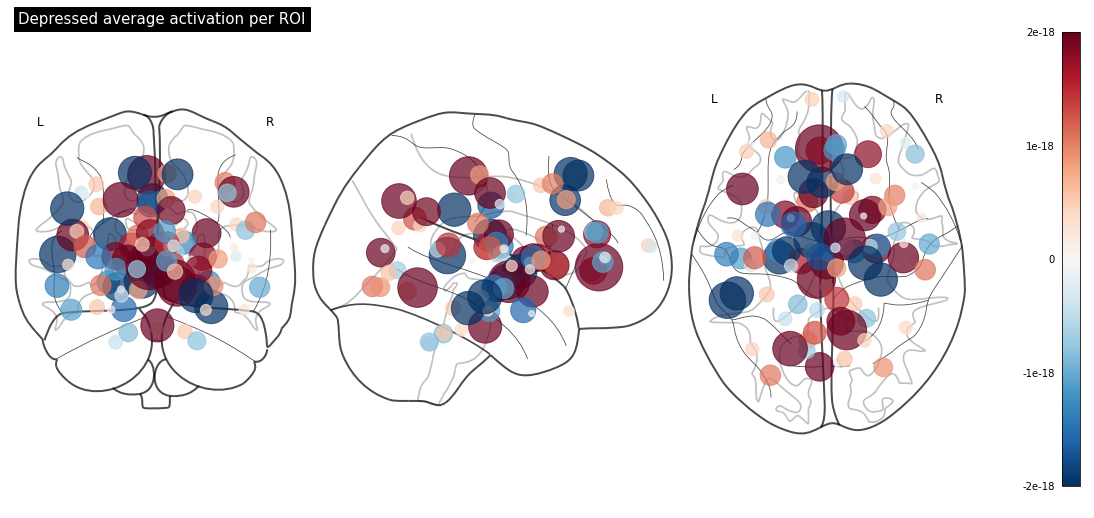

In [84]:

fig=plt.figure(figsize=(15,7))
plotting.plot_markers(
    np.mean(depressed,axis=0),
    coord_list,
    node_cmap="RdBu_r",
    figure=fig,
    node_vmin=-2e-18,
    node_vmax=2e-18,
    node_size=abs(np.mean(depressed,axis=0))*4e20,
    title="Depressed average activation per ROI",
)
